<a href="https://colab.research.google.com/github/Chiragnagori/LGMVIP/blob/master/Exploratory_Data_Analysis_on_Dataset_Terrorism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
terrorism = pd.read_csv("/content/globalterrorism.csv" , encoding = "latin1")
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970.0,7.0,2.0,NaN,0.0,NaN,58.0,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970.0,0.0,0.0,NaN,0.0,NaN,130.0,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970.0,1.0,0.0,NaN,0.0,NaN,160.0,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970.0,1.0,0.0,NaN,0.0,NaN,78.0,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970.0,1.0,0.0,NaN,0.0,NaN,101.0,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [28]:
#Reading each column
terrorism.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [29]:
#Renaming columns

In [30]:
terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [31]:
terrorism = terrorism[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]


In [32]:
#Viewing the first five records
terrorism.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970.0,7.0,2.0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970.0,0.0,0.0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970.0,1.0,0.0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970.0,1.0,0.0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970.0,1.0,0.0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [33]:
#Shape of the Dataset
print(terrorism.shape)

(88811, 18)


In [34]:
#Checking for NULL values if any
terrorism.isnull().sum()

Year              1
Month             1
day               1
Country           1
State           419
Region            1
City            153
latitude       4022
longitude      4023
Attacktype        1
kill           6472
Wound          9668
target1         602
summary       66130
Group             1
Targettype        1
Weapon            1
motive        66669
dtype: int64

In [35]:
#Filling NA values with zero
terrorism['Wound'] = terrorism['Wound'].fillna(0)
terrorism['kill'] = terrorism['kill'].fillna(0)

In [36]:
terrorism['Casulty'] = terrorism['Wound'] + terrorism['kill']

In [37]:
#Viewing the added column ' Casulty'
terrorism.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive,Casulty
0,1970.0,7.0,2.0,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970.0,0.0,0.0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970.0,1.0,0.0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970.0,1.0,0.0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0.0,0.0,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0
4,1970.0,1.0,0.0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0.0,0.0,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


In [38]:
#Information about the Dataset
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88811 entries, 0 to 88810
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        88810 non-null  float64
 1   Month       88810 non-null  float64
 2   day         88810 non-null  float64
 3   Country     88810 non-null  object 
 4   State       88392 non-null  object 
 5   Region      88810 non-null  object 
 6   City        88658 non-null  object 
 7   latitude    84789 non-null  float64
 8   longitude   84788 non-null  float64
 9   Attacktype  88810 non-null  object 
 10  kill        88811 non-null  float64
 11  Wound       88811 non-null  float64
 12  target1     88209 non-null  object 
 13  summary     22681 non-null  object 
 14  Group       88810 non-null  object 
 15  Targettype  88810 non-null  object 
 16  Weapon      88810 non-null  object 
 17  motive      22142 non-null  object 
 18  Casulty     88811 non-null  float64
dtypes: float64(8), object(11)

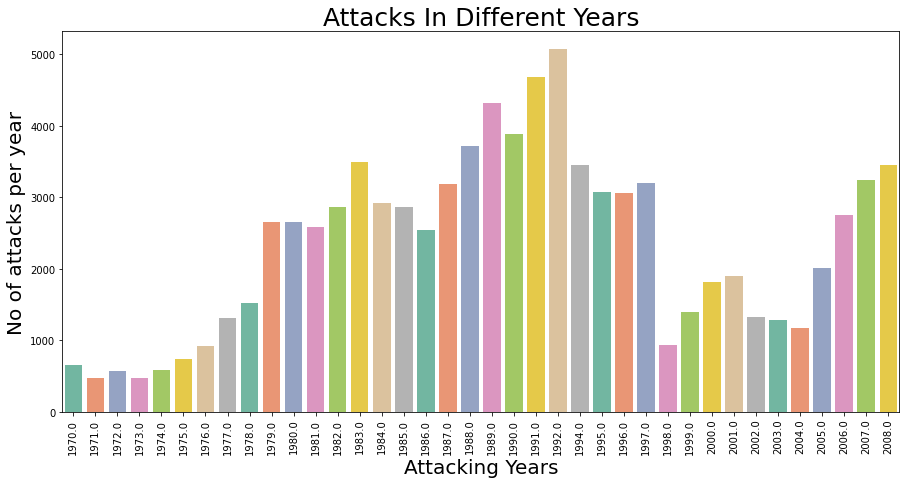

In [39]:
#Bar Plot of Attacks in different years vs No of Attacks
Year = terrorism['Year'].unique()
Years_count = terrorism['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize =(15,7))
sns.barplot(x = Year , y = Years_count , palette = 'Set2' )
plt.xticks(rotation = 90)
plt.title('Attacks In Different Years',fontsize = 25)
plt.xlabel('Attacking Years',fontsize = 20)
plt.ylabel('No of attacks per year',fontsize = 20)
plt.show()


In [40]:
#Bar Plot of Countries vs No of Attacks
attack = terrorism.Country.value_counts()[:10]
attack

Colombia          7024
Peru              6043
El Salvador       5320
India             4755
United Kingdom    4468
Iraq              3958
Spain             3195
Pakistan          2884
Sri Lanka         2864
Turkey            2732
Name: Country, dtype: int64

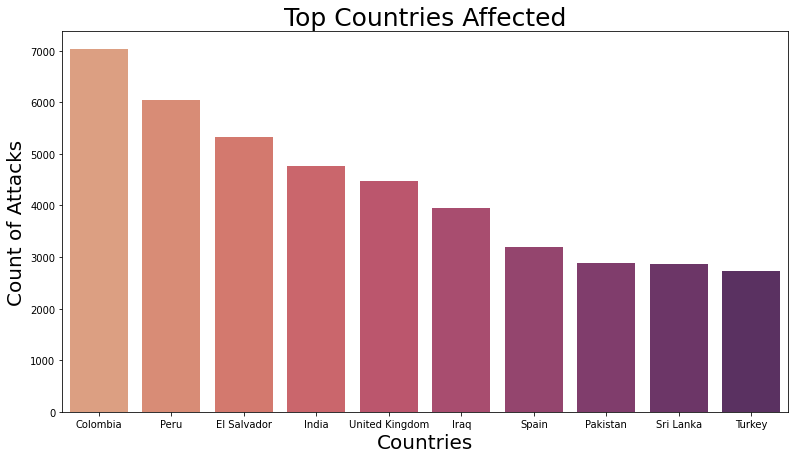

In [41]:
plt.subplots(figsize = (13,7))
sns.barplot(terrorism['Country'].value_counts()[:10].index , terrorism['Country'].value_counts()[:10].values , palette = 'flare')
plt.title('Top Countries Affected',fontsize = 25)
plt.xlabel('Countries',fontsize = 20)
plt.ylabel('Count of Attacks',fontsize = 20)
plt.show()

In [42]:
#Bar Plot of Groups v No of Attacks
group = terrorism.Group.value_counts()[1:10]
group

Shining Path (SL)                                   4515
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2670
Basque Fatherland and Freedom (ETA)                 1999
Revolutionary Armed Forces of Colombia (FARC)       1700
Liberation Tigers of Tamil Eelam (LTTE)             1560
National Liberation Army of Colombia (ELN)          1269
Kurdistan Workers' Party (PKK)                      1166
New People's Army (NPA)                             1155
Name: Group, dtype: int64

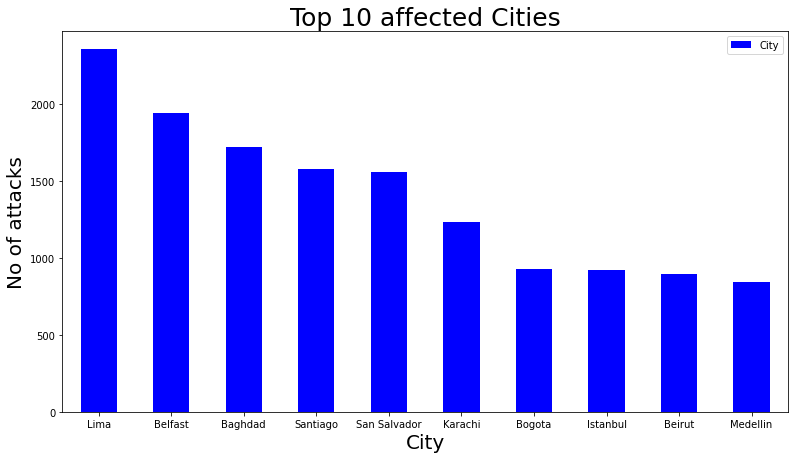

In [43]:
#Bar plot of Top 10 affected cities
terrorism['City'].value_counts().to_frame().drop('Unknown').sort_values('City', axis = 0 , ascending = False).head(10).plot(kind = 'bar', 
figsize = (13,7),color = 'blue')
plt.xticks(rotation = 0)
plt.title('Top 10 affected Cities',fontsize = 25)
plt.xlabel('City',fontsize = 20)
plt.ylabel('No of attacks',fontsize = 20)
plt.show()

In [44]:
#Final Conclusion
df = terrorism[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Shining Path (SL),Peru,11545.0
1,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10756.0
2,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
3,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
4,Revolutionary Armed Forces of Colombia (FARC),Colombia,5041.0
5,Kurdistan Workers' Party (PKK),Turkey,3465.0
6,New People's Army (NPA),Philippines,3317.0
7,Al-Qaida,United States,3001.0
8,National Union for the Total Independence of A...,Angola,2700.0
9,Taliban,Afghanistan,2566.0


In [46]:
kill = terrorism.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 201623


In [47]:
typeKill = terrorism.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,97352.0,17997.0,61140.0,2053.0,3545.0,1545.0,4040.0,667.0,13284.0


In [48]:
countryKill = terrorism.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,4314.0,41.0,10491.0,0.0,3030.0,0.0,490.0,30.0,13.0,27.0,...,1.0,0.0,1128.0,97.0,1.0,217.0,119.0,324.0,70.0,152.0


Conclusion
1.Years with most attack : 2014

2.Region with maximum attacks : Middle East & North Africa

3.Country with most attacks : Iraq

4.Group with most attacks : Taliban

5.City with most attacks : Baghdad

6.Attacktype with most attacks : Bombing/Explosion

7.Attacktype with most killed : Armed Assault

8.Attacktype were used mostly on : Private Citizens & Property

9.Attacktype with most wounded : Bombing/Explosion

10.Major Terrorist group : ISIL



THANK YOU
